In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilities

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Intro

In [2]:
input_file = 'data_multivar.txt'

params = {'kernel': 'linear'}
params = {'kernel': 'poly', 'degree': 3}
params = {'kernel': 'rbf'}

## Tackling class imbalance

In [3]:
input_file = 'data_multivar_imbalance.txt'

params = {'kernel': 'linear', 'class_weight': 'auto'}

In [4]:
X, Y = utilities.load_data(input_file)

class_0 = np.array([X[i] for i in range(len(X)) if Y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if Y[i] == 1])

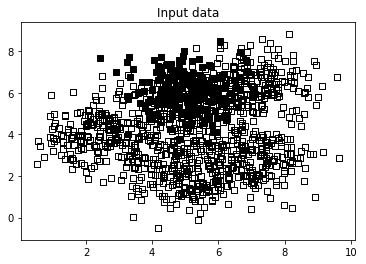

In [5]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black',
           edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None',
           edgecolors='black', marker='s')
plt.title('Input data')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
                                                   random_state=5)

In [8]:
classifier = SVC(**params)

In [9]:
classifier.fit(X_train, Y_train)

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

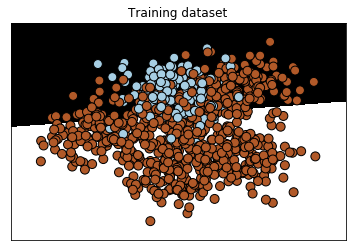

In [10]:
utilities.plot_classifier(classifier, X_train, Y_train, 'Training dataset')
plt.show()

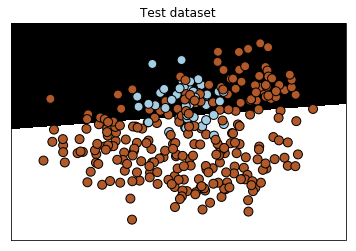

In [11]:
y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, Y_test, 'Test dataset')
plt.show()

In [12]:
from sklearn.metrics import classification_report

In [13]:
target_names = ['Class-' + str(int(i)) for i in set(Y)]
print("#" * 30)
print("\nClassifier performance on training dataset")
print(classification_report(Y_train, classifier.predict(X_train), target_names=target_names))
print("#" * 30)

##############################

Classifier performance on training dataset
             precision    recall  f1-score   support

    Class-0       0.39      0.91      0.54       158
    Class-1       0.97      0.69      0.81       742

avg / total       0.87      0.73      0.76       900

##############################


In [14]:
print("#" * 30)
print("\nClassifier report on test dataset")
print(classification_report(Y_test, y_test_pred, target_names=target_names))
print("#" * 30)

##############################

Classifier report on test dataset
             precision    recall  f1-score   support

    Class-0       0.29      0.76      0.42        42
    Class-1       0.95      0.70      0.80       258

avg / total       0.86      0.71      0.75       300

##############################


## Extracting Confidence Measurements

In [15]:
# Measure the distance from the boundary
input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]])

In [16]:
print("Distance from the boundary: ")
for i in input_datapoints:
    print(i, '-->', classifier.decision_function([i])[0])

Distance from the boundary: 
[ 2.   1.5] --> 3.06081694125
[ 8.  9.] --> -3.40355292893
[ 4.8  5.2] --> -0.146639806336
[ 4.  4.] --> 0.906026984531
[ 2.5  7. ] --> -2.12743149719
[ 7.6  2. ] --> 3.22680632812
[ 5.4  5.9] --> -0.745389091302


In [17]:
# Confidence Measure
params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)

In [18]:
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print("Confidence Measure:")
for i in input_datapoints:
    print(i, '-->', classifier.predict_proba([i])[0])

Confidence Measure:
[ 2.   1.5] --> [ 0.08645741  0.91354259]
[ 8.  9.] --> [ 0.07496201  0.92503799]
[ 4.8  5.2] --> [ 0.19249496  0.80750504]
[ 4.  4.] --> [ 0.0486701  0.9513299]
[ 2.5  7. ] --> [ 0.36519713  0.63480287]
[ 7.6  2. ] --> [ 0.07248813  0.92751187]
[ 5.4  5.9] --> [ 0.68491706  0.31508294]


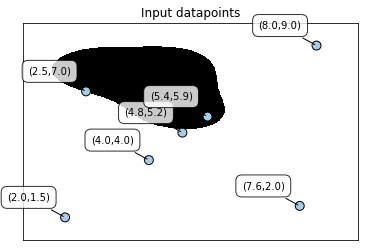

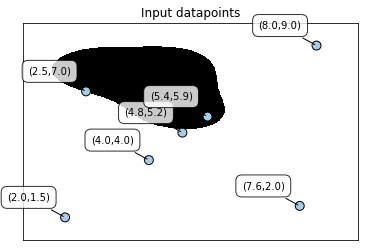

In [21]:
utilities.plot_classifier(classifier, input_datapoints, 
                         [0] * len(input_datapoints), 'Input datapoints', 'True')
plt.show()